In [13]:
from environment import GridWorld
from agent import Agent
import numpy as np
from matplotlib import pyplot as plt

In [14]:
env = GridWorld()
agent = Agent(env)


In [15]:
agent.value_iteration()

Value iteration converged after 22 iterations


array([3.10866558, 3.70149798, 4.30587432, 5.13727884, 5.24550221,
       3.6401609 , 4.21487345, 4.87788587, 5.89598861, 6.30865203,
       3.06550252, 3.48643571, 0.        , 6.75271588, 7.60493592,
       2.56814181, 2.8854946 , 0.        , 8.05937407, 9.18974927,
       2.13798389, 2.14451682, 6.17210931, 9.18974927, 0.        ])

In [16]:
optimal_policy = agent.get_optimal_policy()

Value iteration converged after 22 iterations


In [17]:
trajectory = agent.get_trajectory(optimal_policy)
print(trajectory)
print(agent.get_return(trajectory))

[(0, 0), (0, 1), (0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4), (3, 4), (4, 4)]
10


In [27]:
# Run the optimal policy for 300 trials with 50 episodes each
average_gain_matrix = []
for trial in range(300):
    average_gain_matrix.append(agent.get_average_gain_per_episode(policy=optimal_policy))

average_gain_per_trial = np.mean(average_gain_matrix, axis=0)
std_per_trial = np.std(average_gain_matrix, axis=0)


Text(0.5, 1.0, 'Average Gain per Episode with Standard Deviation Error Bars')

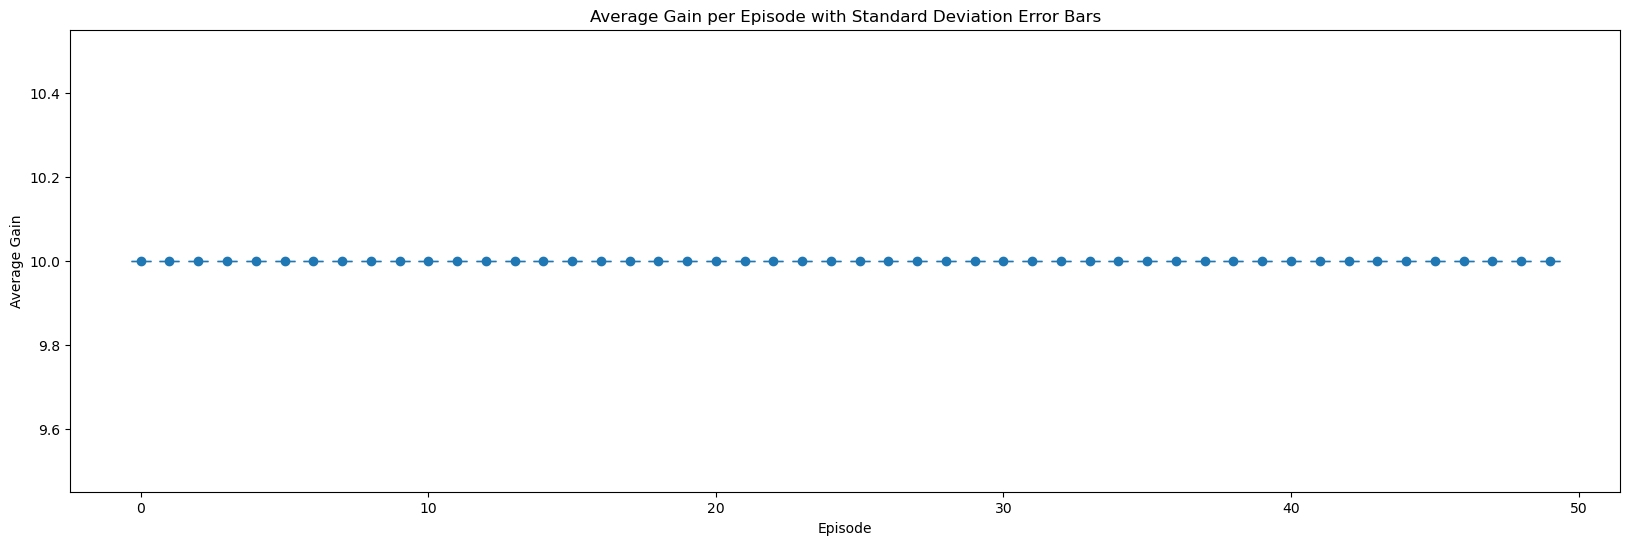

In [45]:
# PLot average gain per episode with standard deviation error bars
plt.figure(figsize=(20, 6))
plt.errorbar(range(0, len(average_gain_per_trial)), average_gain_per_trial, yerr=std_per_trial, fmt="o", capsize=7)
plt.xlabel("Episode")
plt.ylabel("Average Gain")
plt.title("Average Gain per Episode with Standard Deviation Error Bars")

In [49]:
average_gain_per_trial_value_iteration = average_gain_per_trial
agent = Agent(env, sigma=0.8)
mean_and_standard_deviation_per_trial, mean_and_standard_deviation_per_episode = agent.hill_search()

Progress |██████████████████████████████████████████████████| 100.0% Complete


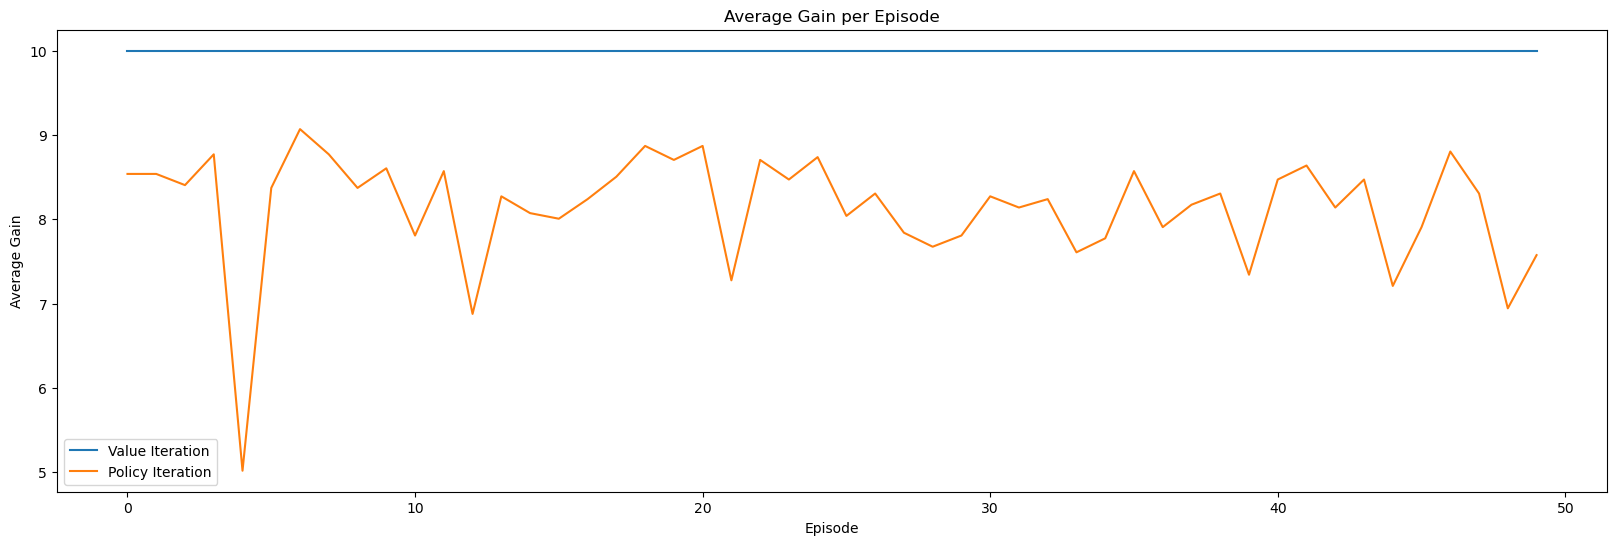

In [50]:
# Plot the optimal policy curve obtained by value interation along with the optimal policy curve obtained by policy iteration
plt.figure(figsize=(20, 6))
plt.plot(range(0, len(average_gain_per_trial)), average_gain_per_trial, label="Value Iteration")
plt.plot(mean_and_standard_deviation_per_episode[0], label="Policy Iteration")
plt.plot
plt.xlabel("Episode")
plt.ylabel("Average Gain")
plt.title("Average Gain per Episode")
plt.legend()